# House heating optimization - experiments
---

## Framework
---

We consider the heat conduction model in apartment. The spatial domain $\mathcal{A}$ modeling our apartment is partitioned into $\{A_i\}_{0 \leq i \leq i_A}$ - sequence of $i_A + 1$ rooms, $\{V\}_{0 \leq i \leq i_V}$- $i_V + 1$ walls, $\{W\}_{0 \leq i \leq i_W}$ - $i_W + 1$ windows, $\{D\}_{0 \leq i \leq i_D}$ - $i_D + 1$ doors and $\{R\}_{0 \leq i \leq i_R}$ - $i_R + 1$ radiators. In particular we have

\begin{equation}
    \mathcal{A} = \left(\bigcup_{i} A_i\right) \cup \left(\bigcup_{i} V_i\right) \cup \left( \bigcup_{i} W_i \right) \cup \left( \bigcup_{i} D_i \right)
\end{equation}

The example of such partition is shown below

TO DO: add image of appartment at initial state

TO DO: make a remark on 

## Mathematical formulation
---

In this experiment we have implemented the following approach of modeling the heat conductation in an appartment $\mathcal{A}$ with heating strategy $S$.

\begin{align} 
    \begin{cases}
        u_t = D_u\Delta u + f_S(t, x, u) &\left[\frac{K}{s}\right], x \in A_i, \\
        \nabla u \cdot n = 0 &\left[\frac{K}{m}\right], x \in V_i, \\
        u = g(t) &\left[K\right], x \in W_i, \\
        u = \frac{1}{|D_i|} \int_{D_i} u(x,t) \:dx &\left[K\right], x \in D_i, \\
        u(x, 0) = u_0(x) &\left[K\right], x \in \Omega.
    \end{cases}
\end{align}

We denote the unit normal vector $n$. The force term $f_S$ denoting the heat given by radiators set up to modes (strategies) $S = \{S_1, S_2, \ldots, S_{i_R}\}$ are given by the following formula

\begin{equation}
    f_S(t, x, u) = \sum_{i = 0}^{i_R} f_i(t, x, u) = Q \sum_{i = 0}^{i_R} \mathbb{1}_{\left\{ x \in \bigcup_{j} R_j \right\}}(x) \ \mathbb{1}_{\left\{ \frac{1}{|\bigcup_{k}\{A_k: S_i \subset A_k\}|} \int_{\bigcup_{k}\{A_k: S_i \subset A_k\}} u(x,t)\:dx \leq S_i \right\}}(u) \quad \left[\frac{K}{s}\right].
\end{equation}

The outside temperature function $g: [0, T] \rightarrow \mathbb{R}$ is given by the equation below

\begin{equation}
    g(t) = 280 - 5\sin\left(\frac{24 t}{3600}\right) \quad \left[K\right].
\end{equation}

We want to study the energy usage using different set of strategies $S = \{S_1, S_2, \ldots, S_{i_R}\}$. In order to do that we define the cost function $\Phi: S \times [0, T] \rightarrow \mathbb{R}_{\geq 0}$ as follows

\begin{equation}
    \Phi_S(t) = \int_0^t \int_\mathcal{A} f_S(s, x, u(x,s)) \:dx \:ds \quad \left[K m\right]
\end{equation}

which reads out as a standard cumulative sum of total energy produced in whole apartment. Obviously this is an increasing function in time variable with $\varphi(S, T)$ being a final cost of strategy $S$.

## Numerical scheme
---

## Packages
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import product
from tqdm import tqdm

## Parameters grid
---

In [2]:
model_parameters = {
        "areas": {
            "A1": {
                "row_min": 0, "row_max": 33, "col_min": 0, "col_max": 50,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 300
            },
            "A2": {
                "row_min": 0, "row_max": 27, "col_min": 50, "col_max": 100,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 300
            },
            "A3": {
                "row_min": 27, "row_max": 55, "col_min": 50, "col_max": 100,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 300
            },
            "A4": {
                "row_min": 33, "row_max": 66, "col_min": 0, "col_max": 33,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 300
            },
            "A5": {
                "row_min": 66, "row_max": 100, "col_min": 0, "col_max": 50,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 300
            },
            "A6.1": {
                "row_min": 33, "row_max": 66, "col_min": 33, "col_max": 50,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 300
            },
            "A6.2": {
                "row_min": 55, "row_max": 100, "col_min": 50, "col_max": 65,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 300
            },
            "A7": {
                "row_min": 55, "row_max": 100, "col_min": 65, "col_max": 100,
                "init_func": lambda x: 285 + 5 * np.random.random(x.shape),
                "desired_temp": 285
            }
        },
        "walls": {
            "VV1": {
                "row_min": 0, "row_max": 100, "col_min": 0, "col_max": 1
            },
            "VV2": {
                 "row_min": 0, "row_max": 1, "col_min": 0, "col_max": 100
            },
            "VV3": {
                 "row_min": 0, "row_max": 100, "col_min": 99, "col_max": 100
            },
            "VV4": {
                "row_min": 99, "row_max": 100, "col_min": 0, "col_max": 100
            },
            "VV5": {
                "row_min": 0, "row_max": 55, "col_min": 49, "col_max": 51
            },
            "VV6": {
                "row_min": 26, "row_max": 28, "col_min": 64, "col_max": 100
            },
            "VV7": {
                "row_min": 32, "row_max": 34, "col_min": 0, "col_max": 34
            },
            "VV8": {
                "row_min": 33, "row_max": 45, "col_min": 32, "col_max": 34
            },
            "VV9": {
                "row_min": 55, "row_max": 66, "col_min": 32, "col_max": 34
            },
            "VV10": {
                "row_min": 65, "row_max": 67, "col_min": 0, "col_max": 34
            },
            "VV11": {
                "row_min": 65, "row_max": 100, "col_min": 49, "col_max": 51
            },
            "VV12": {
                "row_min": 55, "row_max": 100, "col_min": 64, "col_max": 66
            },
            "VV13": {
                "row_min": 54, "row_max": 56, "col_min": 64, "col_max": 100
            }
        },
        "doors": {
            "D1": {
                "row_min": 32, "row_max": 34, "col_min": 34, "col_max": 49
            },
            "D2": {
                "row_min": 26, "row_max": 28, "col_min": 51, "col_max": 66
            },
            "D3": {
                "row_min": 54, "row_max": 56, "col_min": 51, "col_max": 66
            },
            "D4": {
                "row_min": 65, "row_max": 67, "col_min": 34, "col_max": 49
            },
            "D5": {
                "row_min": 45, "row_max": 55, "col_min": 32, "col_max": 34
            },
            "D6": {
                "row_min": 55, "row_max": 65, "col_min": 49, "col_max": 51
            }
        },
        "windows": {
            "W1": {
                "row_min": 0, "row_max": 1, "col_min": 15, "col_max": 35
            },
            "W2": {
                "row_min": 0, "row_max": 1, "col_min": 70, "col_max": 90
            },
            "W3": {
                "row_min": 30, "row_max": 40, "col_min": 99, "col_max": 100
            },
            "W4": {
                "row_min": 99, "row_max": 100, "col_min": 15, "col_max": 35
            }
        },
        "radiators": {
            "R1": {
                "row_min": 2, "row_max": 3, "col_min": 10, "col_max": 35, "mask_value": 1
            },
            "R2": {
                "row_min": 2, "row_max": 3, "col_min": 52, "col_max": 66, "mask_value": 2
            },
            "R3": {
                "row_min": 35, "row_max": 43, "col_min": 30, "col_max": 31, "mask_value": 3
            },
            "R4": {
                "row_min": 97, "row_max": 98, "col_min": 10, "col_max": 35, "mask_value": 4
            }
        },
        "domain": {
            "grid": np.meshgrid(np.linspace(-1, 1, 101), np.linspace(-1, 1, 101))[0], "dx": 1
        },
        "force_term": lambda x, t, mask: np.where(
            mask == 1, 1.5, np.where(
                mask == 2, 1.5, np.where(
                    mask == 3, 1.5, np.where(
                        mask == 4, 1.5, 0
                    )
                )
            )
        ),
        "window_temp": lambda t: 270 - 5 * np.sin(24 * t / 3600),
        "diffusion_coefficient": 0.5,
        "current_time": 0.0

    }

## Setting up the model
---

In [3]:
from main import HeatingModel

In [4]:
model = HeatingModel(model_parameters)

## Total Cost of heating depending on the heating strategy
---

6561it [43:28,  2.52it/s]


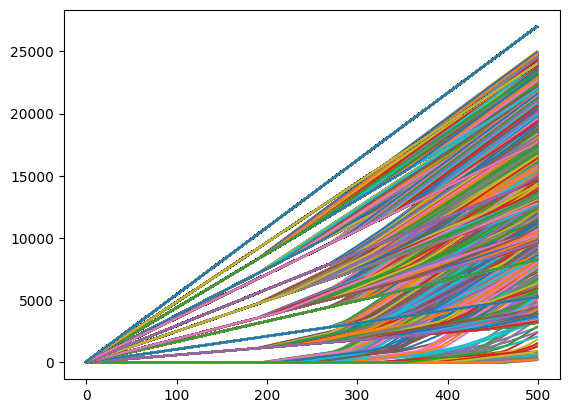

In [5]:
base_strat = [12 + 275, 16 + 275, 20 + 275, 24 + 275, 28 + 275]
base_strat = [12 + 272, 20 + 272, 28 + 272]
time_iters = 500
h_t = 0.5

results = {
    "avg_final_temp": [],
    "energy_usage": []
}

for strategies in tqdm(product(base_strat, repeat=len(model_parameters["areas"].keys()))):
    for cnt, key in enumerate(model_parameters["areas"].keys()):
        model_parameters["areas"][key]["desired_temp"] = strategies[cnt]
        if key not in results.keys():
            results[key] = [strategies[cnt]]
        else:
            results[key].append(strategies[cnt])
    model = HeatingModel(model_parameters)
    model.evolve(time_iters, h_t, True)
    plt.plot(model.energy_usage)
    results["avg_final_temp"].append(sum([model.partial_matrix[key].sum() for key in model.partial_matrix.keys()][:-1]) / sum([model.partial_matrix[key].size for key in model.partial_matrix.keys()][:-1]))
    results["energy_usage"].append(model.energy_usage[-1])
results = pd.DataFrame(results)
plt.show()

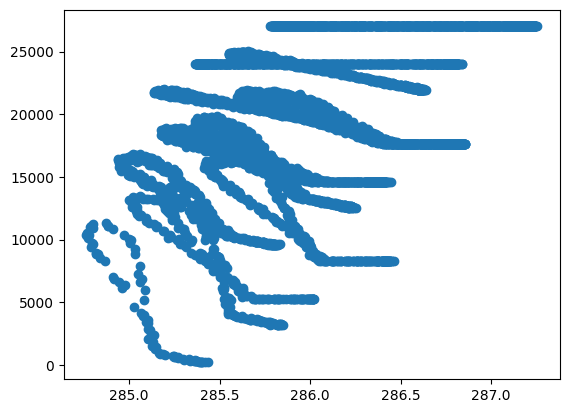

In [6]:
plt.scatter(results.loc[:, "avg_final_temp"], results.loc[:, "energy_usage"])

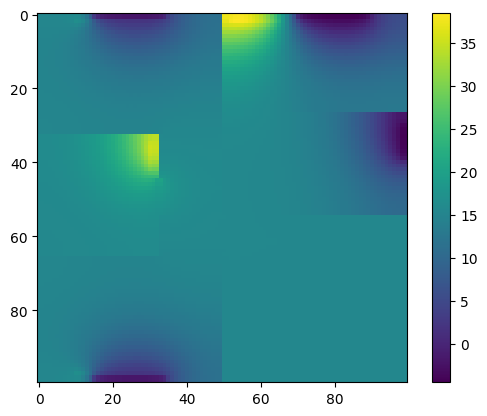

In [10]:
plt.colorbar(plt.imshow(model.result_matrix - 272))

In [8]:
results.to_csv("../data/results/strategies")

In [9]:
sum([model.partial_matrix[key].sum() for key in model.partial_matrix.keys()][:-1]) / sum([model.partial_matrix[key].size for key in model.partial_matrix.keys()][:-1])

285.8084448603872